<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Colour_clustering_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means clustering on the image L*a*b colours by using Scikit Learn in Python


Adopted from:

https://medium.com/analytics-vidhya/color-separation-in-an-image-using-kmeans-clustering-using-python-f994fa398454

and

https://se7entyse7en.dev/posts/color-quantization-using-k-means/

Colour spaces

https://cran.r-project.org/web/packages/colordistance/vignettes/color-spaces.html


Color Separation in an image is a process of separating colors in the image. This process is done through the KMeans Clustering Algorithm.K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.K-means algorithms identify k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

In [ ]:
#load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import plotly as py
import plotly.graph_objs as go
from numpy.random import seed
import cv2
from skimage import color
RAND=2231 # should be your student code abcd
seed(RAND)

In [ ]:
# help function for image reconstruction
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

Text(0.5, 1.0, 'Original image ')

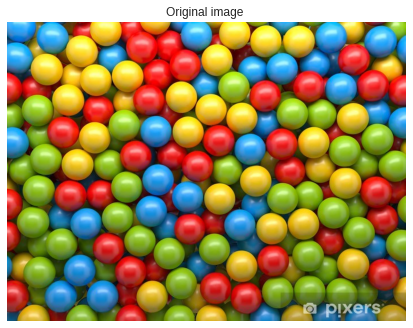

In [ ]:
# Load the colour photo with OpenCV
img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/test4.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.clf()
plt.axis("off")
plt.imshow(img)
plt.title("Original image ")

In [ ]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])



img = np.array(img, dtype=np.float64) / 255.0

img = color.rgb2lab(img)

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))


In [ ]:
# Adopted from: https://stackoverflow.com/questions/31097247/remove-duplicate-rows-of-a-numpy-array
def unique_rows(a):
    a = np.ascontiguousarray(a)
    unique_a = np.unique(a.view([('', a.dtype)]*a.shape[1]))
    return unique_a.view(a.dtype).reshape((unique_a.shape[0], a.shape[1]))

print('Unique colors in picture', unique_rows(image_array).shape[0])    

Unique colors in picture 218467


In [ ]:
print("Fitting model on a small sub-sample of the data")

image_array_sample = shuffle(image_array, random_state=RAND, n_samples=10000)

Fitting model on a small sub-sample of the data


Text(0.5, 0.92, 'Original image colours 3D scatter plot')

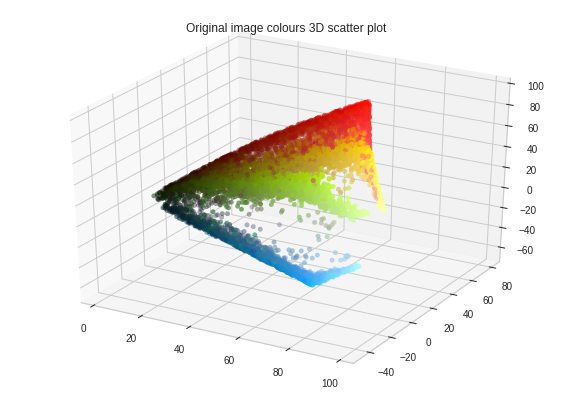

In [ ]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(image_array_sample[:,0],image_array_sample[:,1],image_array_sample[:,2], c = color.lab2rgb(image_array_sample))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
plt.title("Original image colours 3D scatter plot")


In [ ]:
n_colors = 5

In [ ]:
t0 = time()
kmeans = KMeans(n_clusters=n_colors, init="k-means++", random_state=RAND, n_init=10).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")
k_labels=kmeans.labels_
#print(labels)
k_labels=list(k_labels)

done in 0.594s.


In [ ]:
centroid=kmeans.cluster_centers_
print(centroid)

[[ 62.9151664  -28.74348681  55.42423155]
 [ 22.16476422   1.92630079  19.76838331]
 [ 55.1282099   -6.41209553 -36.22933064]
 [ 45.98646492  58.42389064  43.1408305 ]
 [ 77.94809778  -0.71646479  69.37553073]]


In [ ]:
percent=[]
for i in range(len(centroid)):
  j=k_labels.count(i)
  j=j/(len(k_labels))
  percent.append(j)
print(percent)

[0.2334, 0.1744, 0.18, 0.2277, 0.1845]


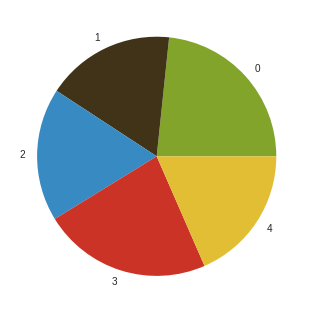

In [ ]:
plt.pie(percent,colors=color.lab2rgb(np.array(centroid)),labels=np.arange(len(centroid)))
plt.show()

Text(0.5, 0.92, 'Clustered image colours 3D scatter plot')

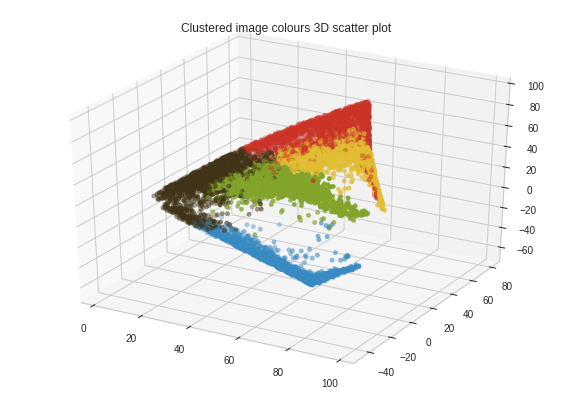

In [ ]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(image_array_sample[:,0],image_array_sample[:,1],image_array_sample[:,2],    c = color.lab2rgb(centroid[k_labels,:]))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
plt.title("Clustered image colours 3D scatter plot")


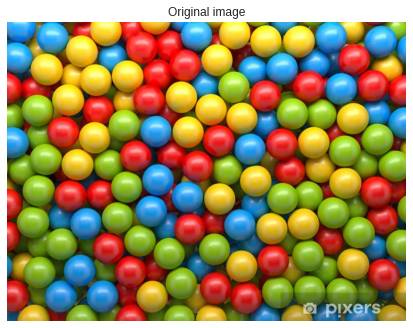

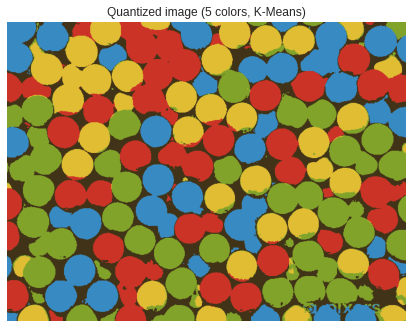

In [ ]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(color.lab2rgb(img))

#"Predicting color indices on the full image k-means
labels = kmeans.predict(image_array)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(color.lab2rgb(recreate_image(kmeans.cluster_centers_, labels, w, h)))



# What is the optimal number of colors?

**Elbow Method:-**
The Elbow Method is one of the most popular methods to determine this optimal value of k.

We now define the following:-

Inertia: It is the sum of squared distances of samples to their closest cluster center.

We iterate the values of k from 1 to n and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

[11497519.460538924, 7215707.058743456, 4274132.074369151, 2631424.4616455343, 2251870.0089585455, 1905162.8316138862, 1631175.883932908, 1374140.3068808885, 1206689.8612110838, 1074122.4754434098, 1002113.7291875866, 935895.6040138903, 883194.2542998464, 818100.9447878414, 781920.9301071529, 728854.4817896694, 694997.9140579684, 667439.132221299, 643026.784774868]


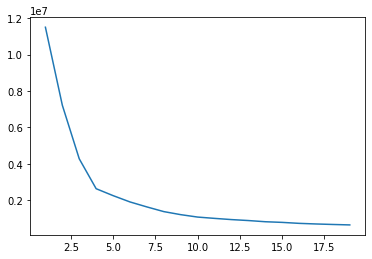

In [ ]:
md=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(image_array_sample)
  o=kmeans.inertia_
  md.append(o)
print(md)
plt.plot(list(np.arange(1,20)),md)
plt.show()

KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


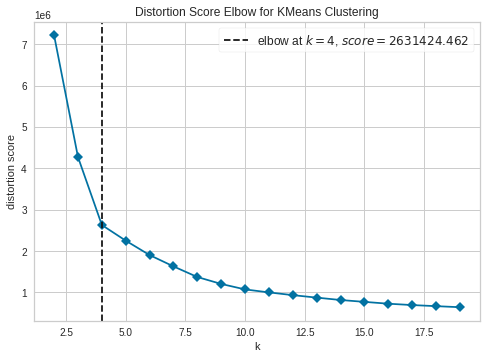

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(2,20), metric='distortion', timings=False)
#metric='calinski_harabasz'
#metric='silhouette'
#metric='distortion'
visualizer.fit(image_array_sample)        # Fit the data to the visualizer
visualizer.show(timings=False)        # Finalize and render the figure

#Let's play with more colours

In [ ]:
n_colors=4
from time import time
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

Fitting model on a small sub-sample of the data
done in 0.064s.
Predicting color indices on the full image (k-means)
done in 0.016s.


In [ ]:
labels[np.where(labels==0)]=2

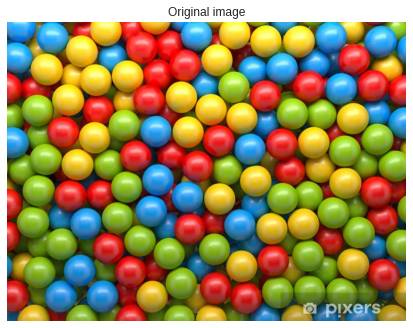

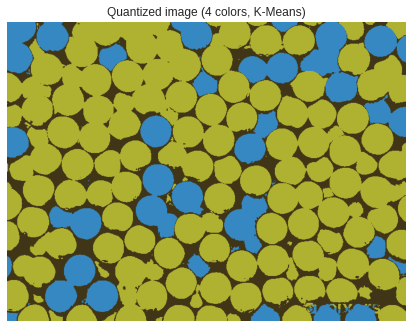

In [ ]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(color.lab2rgb(img))

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(color.lab2rgb(recreate_image(kmeans.cluster_centers_, labels, w, h)))



In [ ]:
#Let's count the unique colours
re_image=recreate_image(kmeans.cluster_centers_, labels, w, h)
re_image_array = np.reshape(re_image, (w * h, d))
print('Unique colors in picture', unique_rows(re_image_array).shape)  

Unique colors in picture (64, 3)
